In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\Users\Avanthi\New folder\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\Avanthi\Desktop\data science\Stats & ML by Sundaram- 27th Nov 2023\5th Jan 2024\car_price.csv")
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
df.shape

(5512, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
import re
price=[]
for i in df['car_prices_in_rupee']:
    if 'Lakh' in i:
         price.append(i.split()[0])
    elif 'Crore' in i:
        price.append(float(i.split()[0])*100)
    else:
        res = re.sub(r',','',i)
        price.append(float(res)/100000)
    


In [6]:
pd.DataFrame(price).isnull().sum()

0    0
dtype: int64

In [4]:
df['car_prices_in_rupee'] = pd.DataFrame(price, dtype = 'float')

In [8]:
df['car_prices_in_rupee'].isnull().sum()

0

In [5]:
df.rename(columns = {'car_prices_in_rupee':'car_prices_in_lakhs'}, inplace = True)

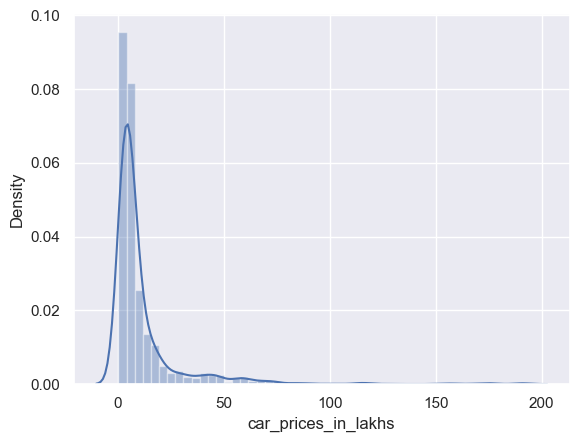

In [10]:
sns.distplot(df['car_prices_in_lakhs'])
plt.show()

In [9]:
df.to_csv('car.csv')

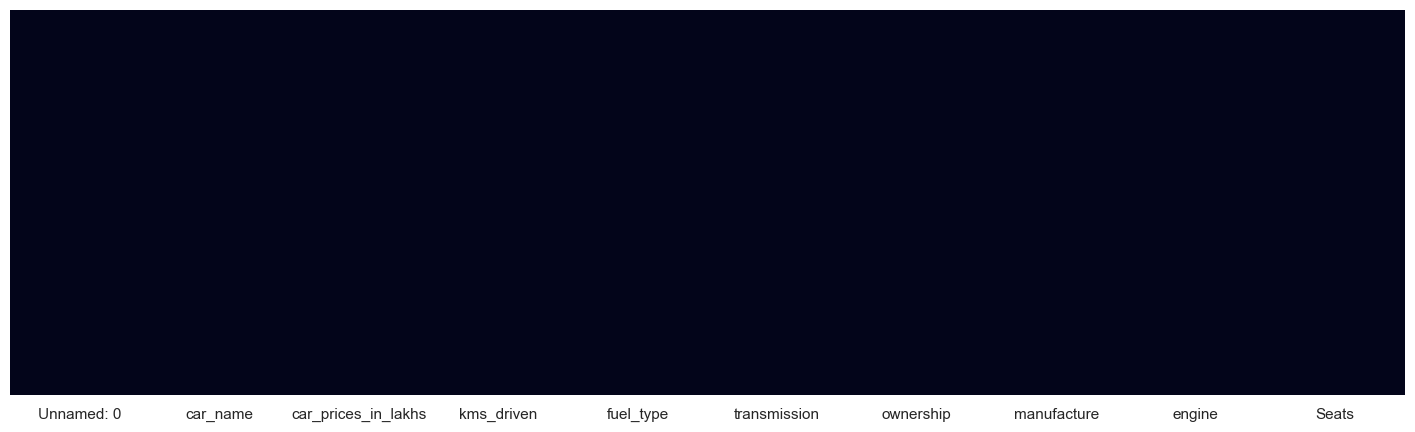

In [11]:
# checking for missing data
plt.figure(figsize = (18,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)
plt.xlabel = ('Features')
plt.ylabel = ('fjnd')
plt.show()

In [12]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_name             5512 non-null   object 
 2   car_prices_in_lakhs  5512 non-null   float64
 3   kms_driven           5512 non-null   object 
 4   fuel_type            5512 non-null   object 
 5   transmission         5512 non-null   object 
 6   ownership            5512 non-null   object 
 7   manufacture          5512 non-null   int64  
 8   engine               5512 non-null   object 
 9   Seats                5512 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 430.8+ KB


In [13]:
df.describe(include = 'all')

,Unnamed: 0,car_name,car_prices_in_lakhs,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
count,5512.000000,5512,5512.000000,5512,5512,5512,5512,5512.000000,5512,5512
unique,NaN,1896,NaN,2610,5,2,6,NaN,139,6
top,NaN,Maruti Alto 800 LXI,NaN,"80,000 kms",Petrol,Manual,1st Owner,NaN,1197 cc,5 Seats
freq,NaN,53,NaN,163,2967,3962,3736,NaN,714,4673
mean,2755.500000,NaN,11.625096,NaN,NaN,NaN,NaN,2015.455552,NaN,NaN
std,1591.321673,NaN,19.699189,NaN,NaN,NaN,NaN,3.927974,NaN,NaN
min,0.000000,NaN,0.350000,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
25%,1377.750000,NaN,3.150000,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN
50%,2755.500000,NaN,5.500000,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,4133.250000,NaN,10.257500,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN


In [14]:
df['fuel_type'].value_counts()

fuel_type
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: count, dtype: int64

In [15]:
df['transmission'].value_counts()

transmission
Manual       3962
Automatic    1550
Name: count, dtype: int64

In [16]:
df['ownership'].value_counts()

ownership
1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: count, dtype: int64

In [17]:
df['car_name'].value_counts()

car_name
Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: count, Length: 1896, dtype: int64

In [18]:
df['engine'] = pd.DataFrame([i.split()[0] for i in df['engine']], dtype = 'float')

In [19]:
import re
kms = []
for i in df['kms_driven']:
    res = re.sub(r',', '', i)
    kms.append(res.split()[0])
kms

['86226',
 '13248',
 '60343',
 '26696',
 '69414',
 '49719',
 '43688',
 '14470',
 '21429',
 '31750',
 '38203',
 '110284',
 '10381',
 '32378',
 '38906',
 '59313',
 '85672',
 '34971',
 '35894',
 '56000',
 '56568',
 '48872',
 '17346',
 '15414',
 '21239',
 '62361',
 '79329',
 '11945',
 '51324',
 '5717',
 '46417',
 '100161',
 '35424',
 '51085',
 '30983',
 '32681',
 '57581',
 '39821',
 '21186',
 '34972',
 '46623',
 '18557',
 '58463',
 '5000',
 '66000',
 '14000',
 '61000',
 '65392',
 '37000',
 '9000',
 '32000',
 '68000',
 '13000',
 '30000',
 '34300',
 '45000',
 '37000',
 '50000',
 '105241',
 '54000',
 '19600',
 '48000',
 '69500',
 '71000',
 '48894',
 '46257',
 '78264',
 '42451',
 '131861',
 '128004',
 '150349',
 '29033',
 '99000',
 '47000',
 '35000',
 '58000',
 '48000',
 '45000',
 '60000',
 '23000',
 '45000',
 '45000',
 '58000',
 '48000',
 '18000',
 '16000',
 '24000',
 '36000',
 '35000',
 '64000',
 '72000',
 '29900',
 '20000',
 '160000',
 '16000',
 '17000',
 '111000',
 '38000',
 '32000',
 '670

In [20]:
df['kms_driven'] = pd.DataFrame(kms, dtype = 'float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_name             5512 non-null   object 
 2   car_prices_in_lakhs  5512 non-null   float64
 3   kms_driven           5512 non-null   float64
 4   fuel_type            5512 non-null   object 
 5   transmission         5512 non-null   object 
 6   ownership            5512 non-null   object 
 7   manufacture          5512 non-null   int64  
 8   engine               5512 non-null   float64
 9   Seats                5512 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 430.8+ KB


# univariate analysis

In [22]:
numerical=['car_prices_in_lakhs','kms_driven','manufacture','engine']

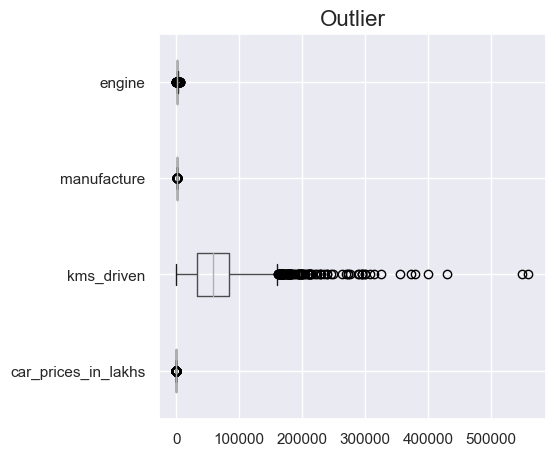

In [23]:
plt.figure(figsize=(5,5))
df[numerical].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

In [24]:
df[numerical].max().sort_values()

car_prices_in_lakhs       192.0
manufacture              2022.0
engine                   5950.0
kms_driven             560000.0
dtype: float64

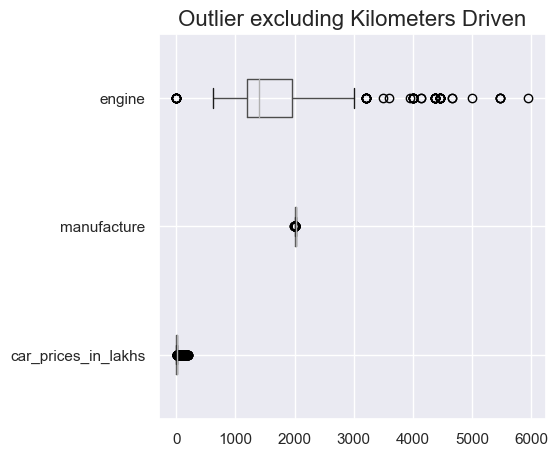

In [25]:
plt.figure(figsize=(5,5))
df[numerical].drop(['kms_driven'], axis=1).boxplot(vert=0)
plt.title("Outlier excluding Kilometers Driven", fontsize=16)
plt.show()

In [26]:
# Number of outliers

def outlier_check(df):
  for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype=='float64' :
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_range = Q1 - (1.5 * IQR)
      upper_range = Q3 + (1.5 * IQR)
      #print(f"{style.BOLD}{col}{style.END}")
      print("Number of outliers :", df[(df[col] > upper_range) | (df[col] < lower_range)].shape[0])
      print("Percentage of outliers :{0:10.3f}".format(((df[(df[col]> upper_range) | (df[col] < lower_range)].shape[0])/df.shape[0])*100), "%\n")


In [27]:
outlier_check(df)

Number of outliers : 0
Percentage of outliers :     0.000 %

Number of outliers : 678
Percentage of outliers :    12.300 %

Number of outliers : 111
Percentage of outliers :     2.014 %

Number of outliers : 75
Percentage of outliers :     1.361 %

Number of outliers : 66
Percentage of outliers :     1.197 %



# bivariate analysis

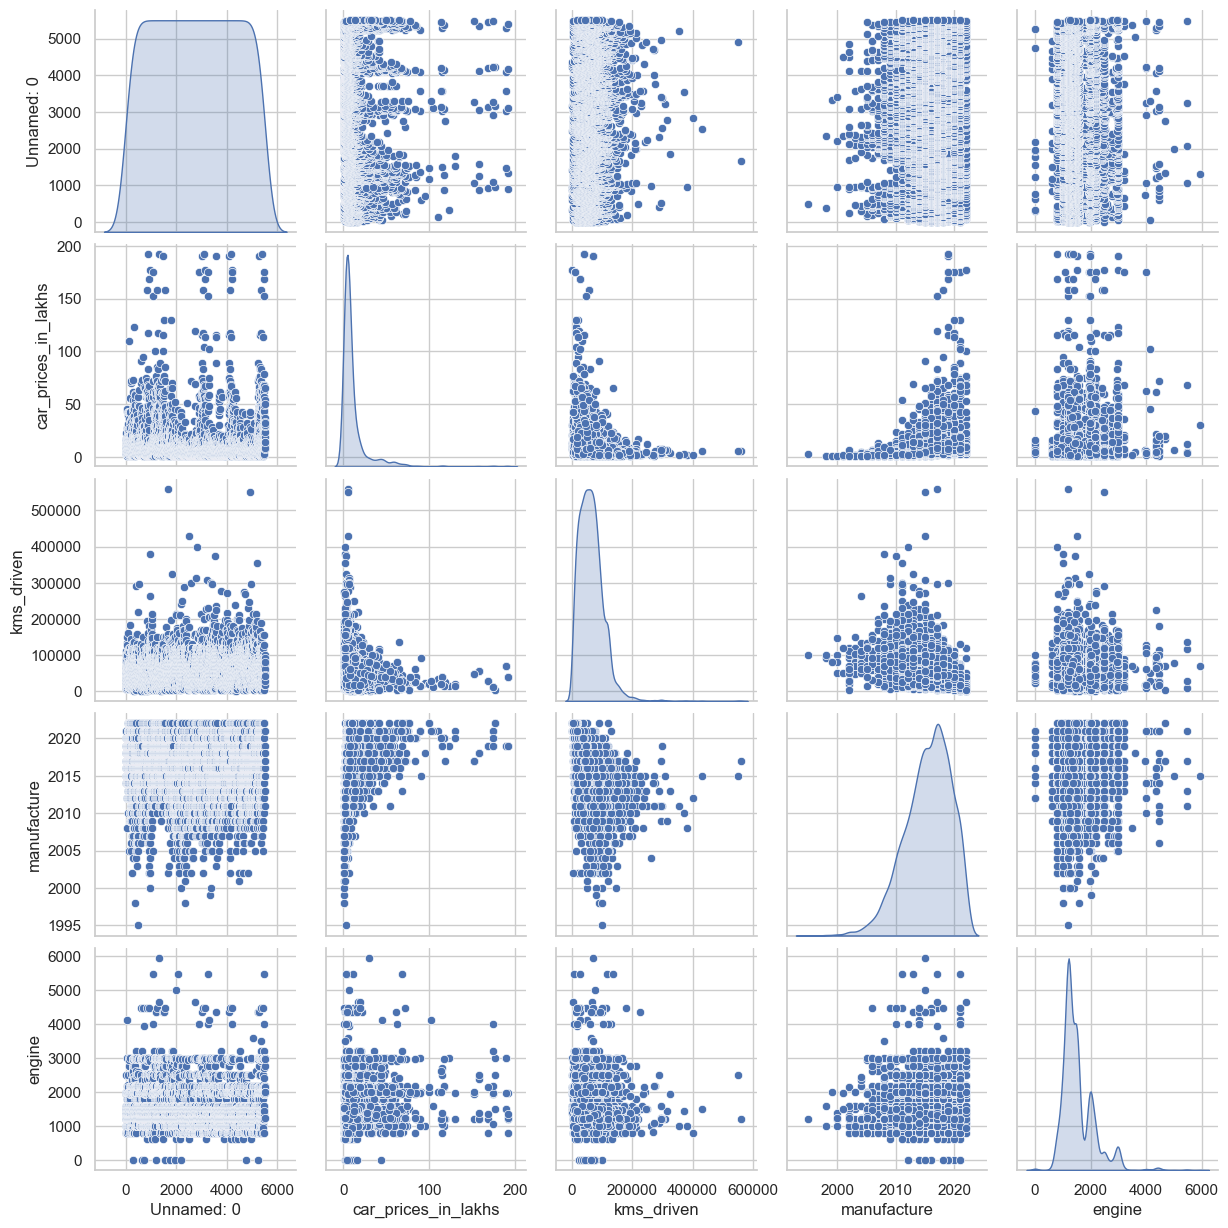

In [28]:
sns.set_style('whitegrid')
sns.pairplot(data=df, diag_kind='kde')
plt.show()

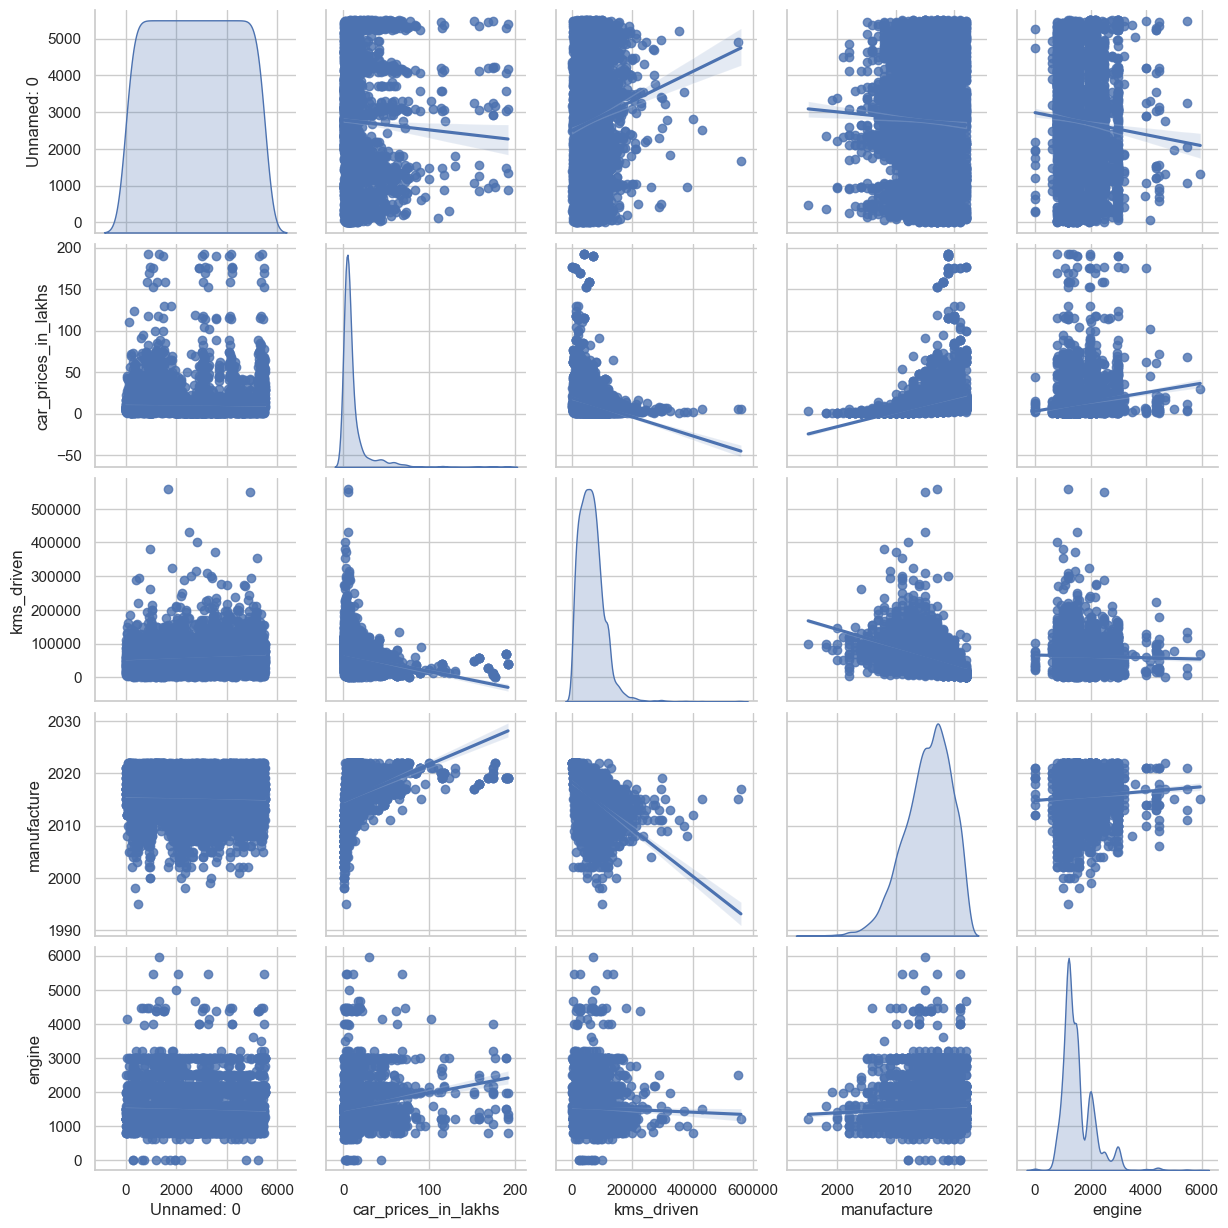

In [29]:
sns.pairplot(data=df,kind='reg', diag_kind='kde')

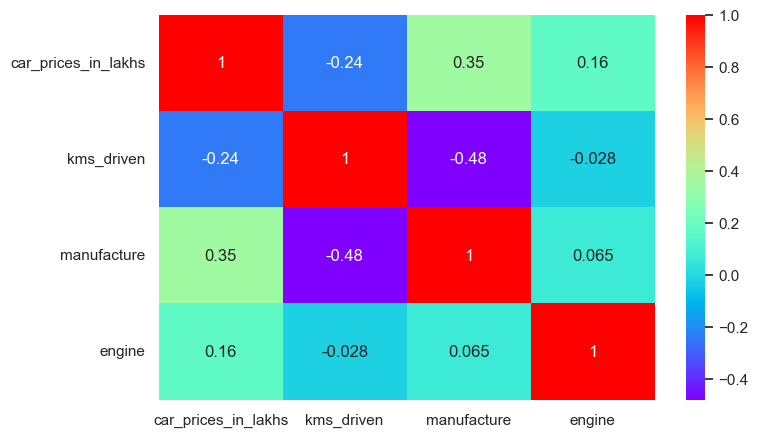

In [30]:
plt.figure(figsize = (8,5))
sns.heatmap(df[numerical].corr(), annot = True, cmap='rainbow')
plt.show()

<Axes: xlabel='ownership', ylabel='car_prices_in_lakhs'>

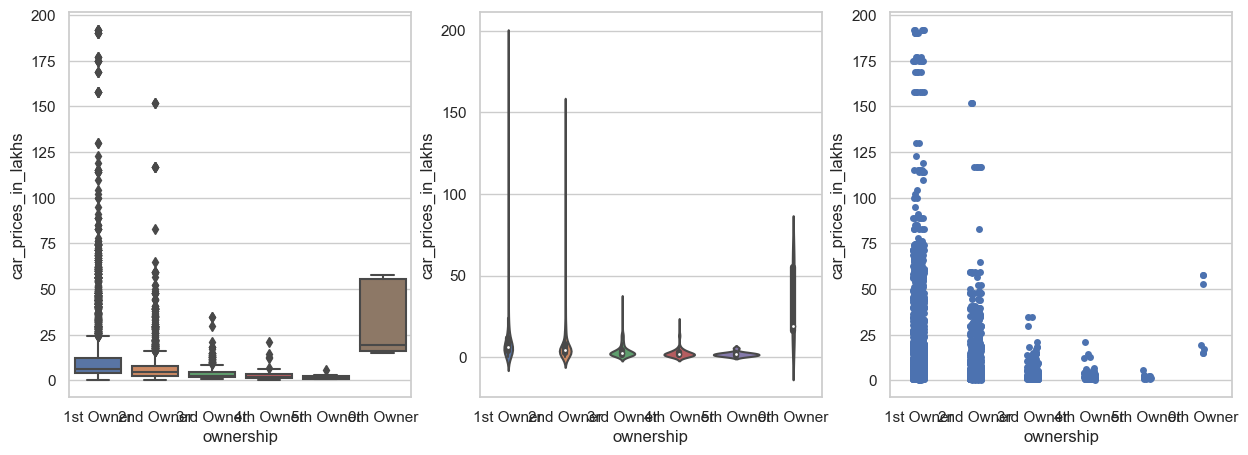

In [31]:
# checking for outliers
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.boxplot(x = df['ownership'], y= df['car_prices_in_lakhs'], data = df ,  order = df['ownership'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['ownership'], y= df['car_prices_in_lakhs'], data = df ,  order = df['ownership'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['ownership'], y= df['car_prices_in_lakhs'], data = df ,  order = df['ownership'].value_counts().index)

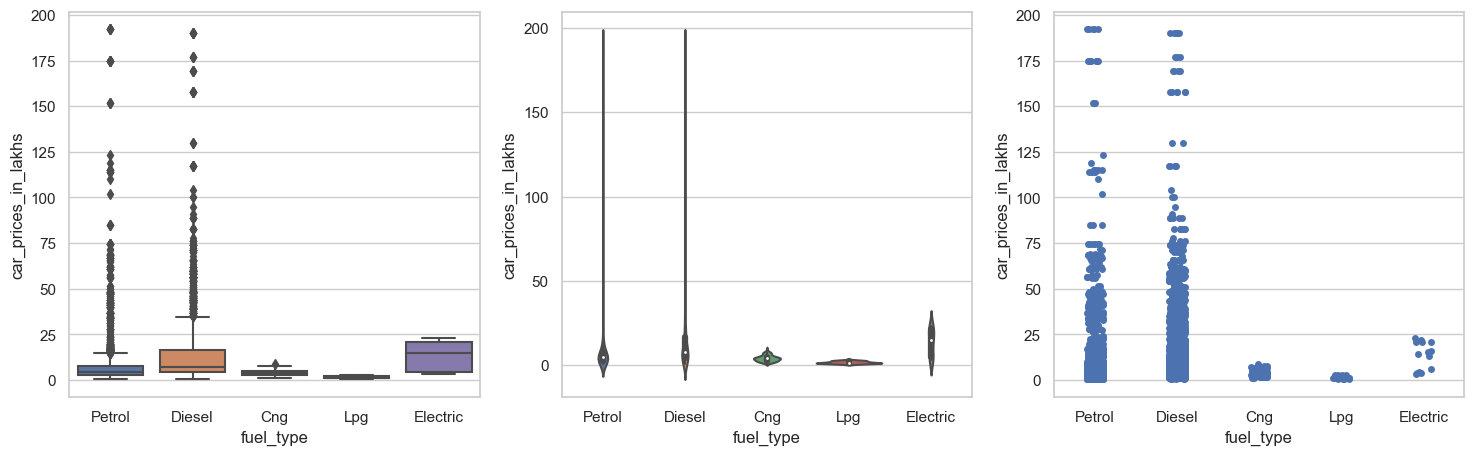

In [32]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(x = df['fuel_type'], y=df['car_prices_in_lakhs'], data = df, order = df['fuel_type'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['fuel_type'], y=df['car_prices_in_lakhs'], data = df, order = df['fuel_type'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['fuel_type'], y=df['car_prices_in_lakhs'], data = df, order = df['fuel_type'].value_counts().index)
plt.show()

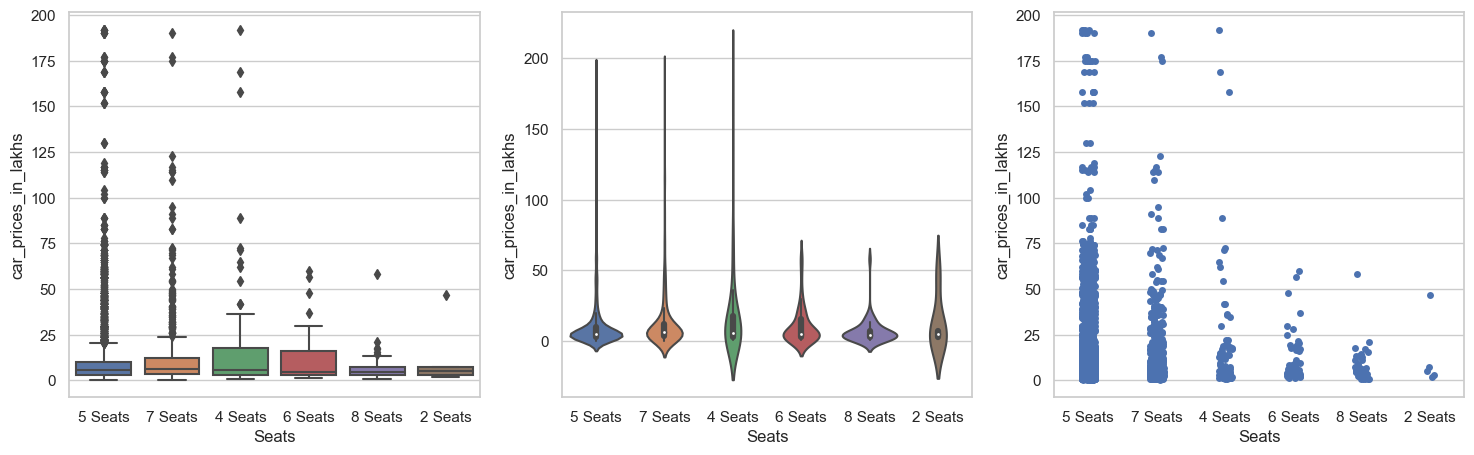

In [33]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(x = df['Seats'], y=df['car_prices_in_lakhs'], data = df, order = df['Seats'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['Seats'], y=df['car_prices_in_lakhs'], data = df, order = df['Seats'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['Seats'], y=df['car_prices_in_lakhs'], data = df, order = df['Seats'].value_counts().index)
plt.show()

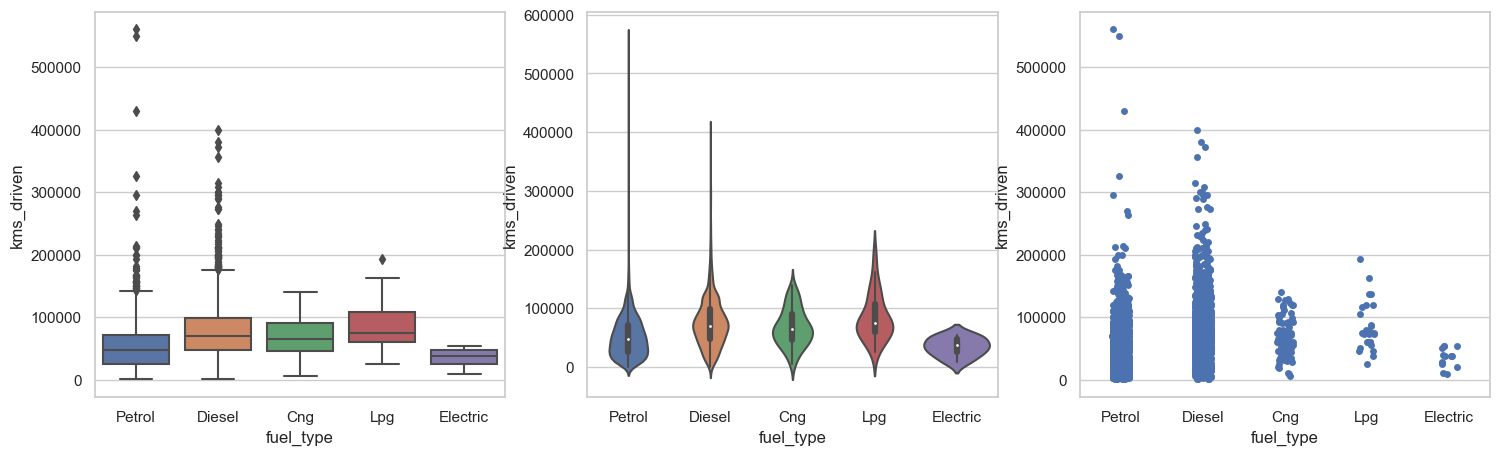

In [34]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)
plt.show()

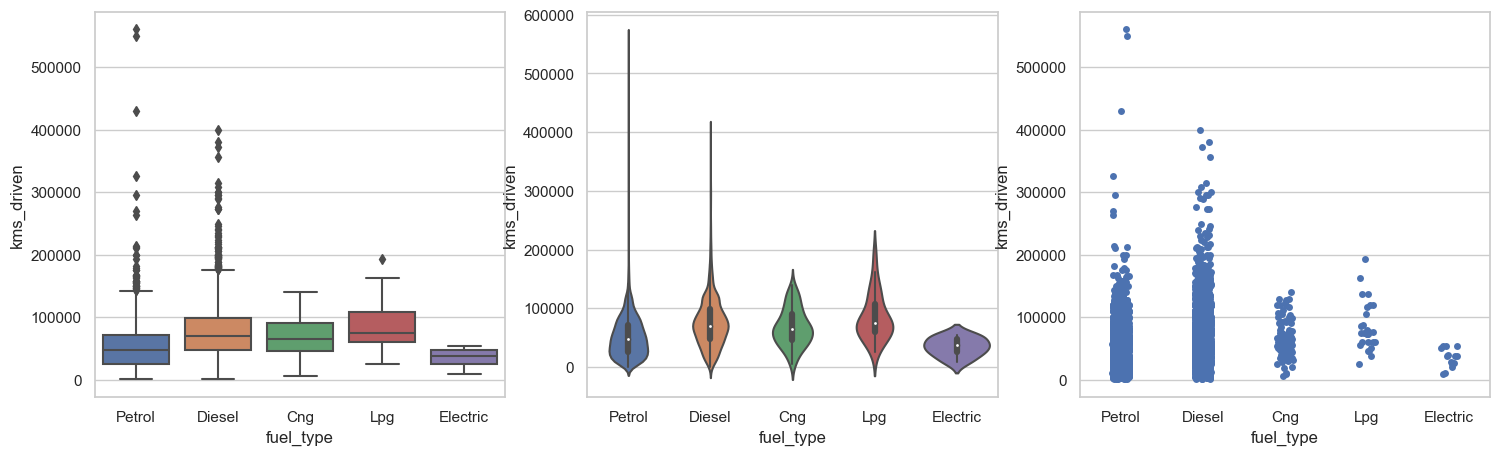

In [35]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.boxplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)
plt.subplot(1,3,2)
sns.violinplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)
plt.subplot(1,3,3)
sns.stripplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)
plt.show()

<Axes: xlabel='fuel_type', ylabel='kms_driven'>

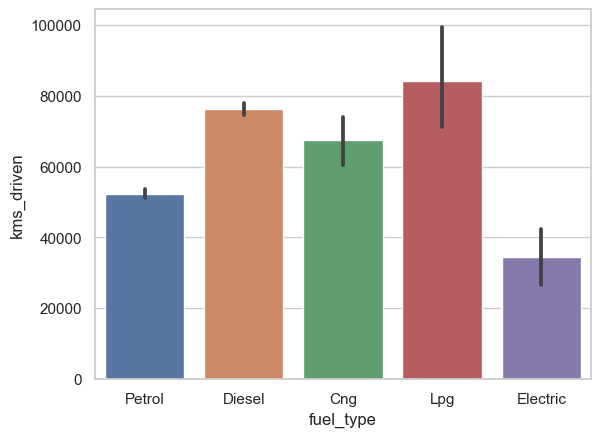

In [36]:
sns.barplot(x = df['fuel_type'], y=df['kms_driven'], data = df, order = df['fuel_type'].value_counts().index)


# Multi Variate Analysis

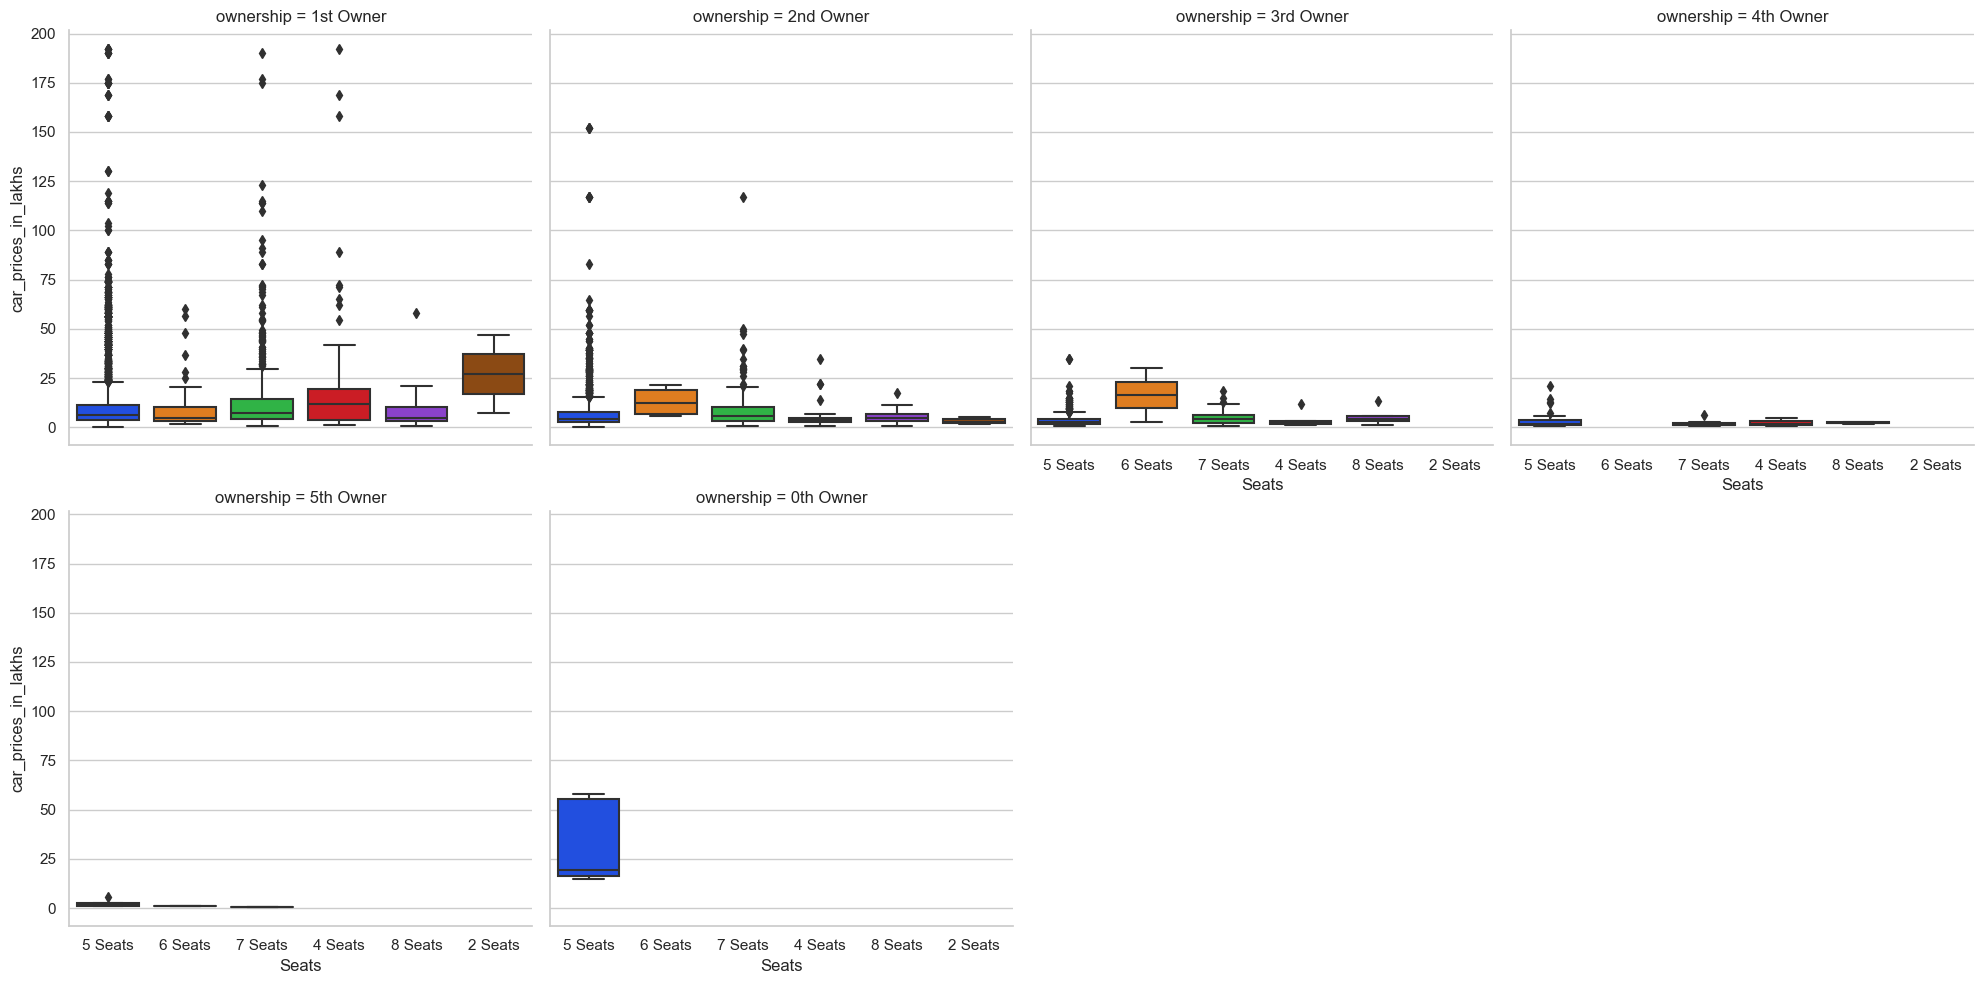

In [37]:
f = sns.catplot(x='Seats', y = 'car_prices_in_lakhs', col='ownership', col_wrap=4, data=df, kind='box',ci=False,
                   palette='bright', aspect=1)

In [38]:
pd.crosstab(df.fuel_type, df.transmission, margins= True, values=df.car_prices_in_lakhs, aggfunc='mean')

transmission,Automatic,Manual,All
fuel_type,,,
Cng,NaN,4.000875,4.000875
Diesel,32.544277,6.299125,15.365238
Electric,13.466429,NaN,13.466429
Lpg,NaN,1.572846,1.572846
Petrol,23.750286,4.274016,8.862460
All,28.406155,5.060069,11.625096


# Data Preprocessing

In [39]:
df.describe()

,Unnamed: 0,car_prices_in_lakhs,kms_driven,manufacture,engine
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,2755.500000,11.625096,63211.888062,2015.455552,1532.299710
std,1591.321673,19.699189,41844.131167,3.927974,579.210876
min,0.000000,0.350000,250.000000,1995.000000,0.000000
25%,1377.750000,3.150000,33151.750000,2013.000000,1197.000000
50%,2755.500000,5.500000,59000.000000,2016.000000,1396.000000
75%,4133.250000,10.257500,84265.250000,2018.000000,1950.000000
max,5511.000000,192.000000,560000.000000,2022.000000,5950.000000


In [40]:
df.duplicated().sum()

0

In [41]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [42]:
df.duplicated().sum()

76

In [43]:
df = df.drop_duplicates(ignore_index = True)

In [44]:
df.duplicated().sum()

0

In [45]:
df.isnull().sum()

car_name               0
car_prices_in_lakhs    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

<Axes: >

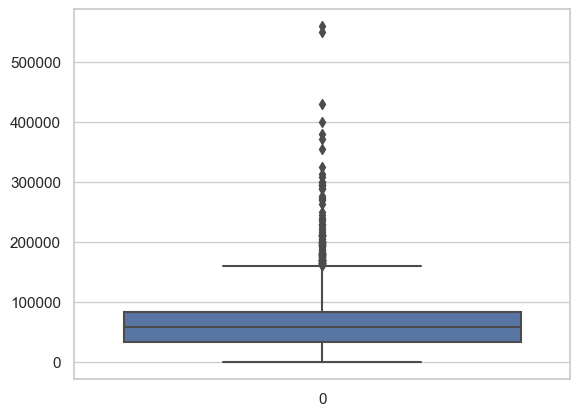

In [46]:
sns.boxplot(df['kms_driven'])

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range, upper_range

In [48]:
columns = ['kms_driven','engine']
for column in columns:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

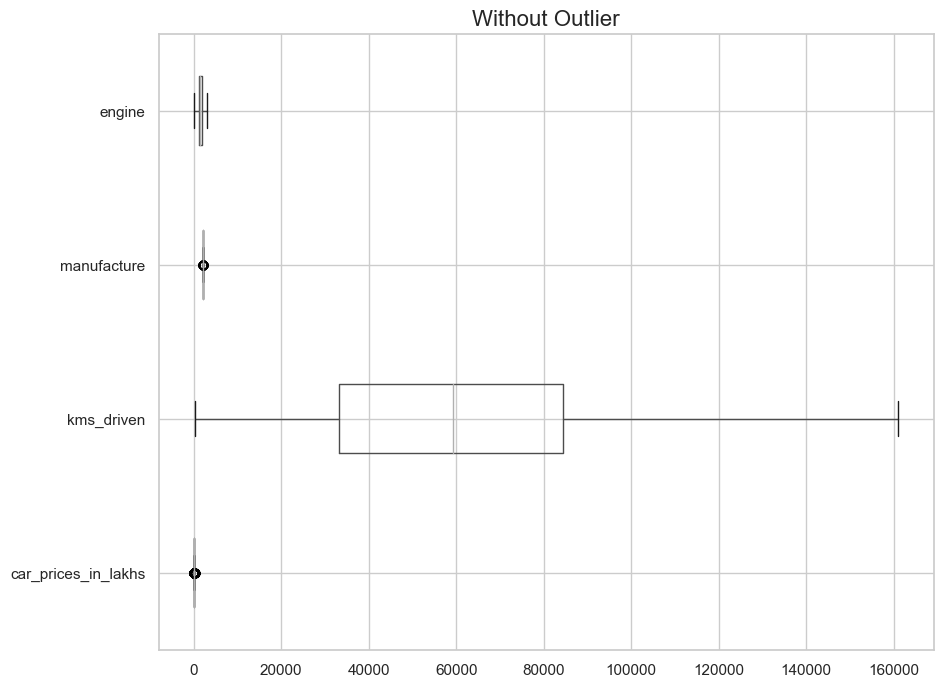

In [49]:
plt.figure(figsize=(10,8))
plt.title("Without Outlier", fontsize=16)
df.boxplot(vert=0)
plt.show()

In [50]:
df['Seats'] = pd.DataFrame([i.split()[0] for i in df['Seats']], dtype = 'float')

df['Seats'] = pd.DataFrame([i.split()[0] for i in df['Seats']], dtype = 'float')

In [51]:
# converting char vbles to number
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
df['fuel_type'] = encoding.fit_transform(df['fuel_type'])

In [52]:
df['transmission'] = encoding.fit_transform(df['transmission'])

In [53]:
df['ownership'] = encoding.fit_transform(df['ownership'])

In [54]:
df['car_name'] = encoding.fit_transform(df['car_name'])


In [55]:
df['Seats'].value_counts()

Seats
5.0    4603
7.0     626
4.0      88
6.0      60
8.0      54
2.0       5
Name: count, dtype: int64

In [56]:
df['Seats']=encoding.fit_transform(df['Seats'])

In [57]:
df.head()

,car_name,car_prices_in_lakhs,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,743,10.03,86226.0,1,1,1,2017,1956.0,2
1,1444,12.83,13248.0,4,0,1,2021,1330.0,2
2,1706,16.40,60343.0,4,0,1,2016,2494.0,2
3,385,7.77,26696.0,4,0,1,2018,1199.0,2
4,1831,5.15,69414.0,4,1,1,2016,1199.0,2


In [58]:
df['Seats'].value_counts()

Seats
2    4603
4     626
1      88
3      60
5      54
0       5
Name: count, dtype: int64

In [59]:
x = df.drop(['car_prices_in_lakhs'], axis = 1)
y = df[['car_prices_in_lakhs']]

In [60]:
x.head(2)

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,743,86226.0,1,1,1,2017,1956.0,2
1,1444,13248.0,4,0,1,2021,1330.0,2


In [61]:
y.head(2)

,car_prices_in_lakhs
0,10.03
1,12.83


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)

In [63]:
variable = sc_x.copy()
variable.shape

(5436, 8)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

In [65]:

vif['Features']=x.columns

In [66]:
vif

,variance_inflation_factor,Features
0,1.013641,car_name
1,1.662047,kms_driven
2,1.204595,fuel_type
3,1.141607,transmission
4,1.245589,ownership
5,1.664710,manufacture
6,1.060343,engine
7,1.025893,Seats


In [67]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [69]:
from sklearn.metrics import r2_score

In [70]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.35915885254246105
0.33612207927406557


In [71]:
from statsmodels.regression.linear_model import OLS

In [72]:
import statsmodels.regression.linear_model as smf

In [73]:
reg_model = smf.OLS(endog = y_train,exog = x_train).fit()

In [74]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_prices_in_lakhs   R-squared (uncentered):                   0.516
Model:                             OLS   Adj. R-squared (uncentered):              0.515
Method:                  Least Squares   F-statistic:                              542.8
Date:                 Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                         16:13:04   Log-Likelihood:                         -16927.
No. Observations:                 4077   AIC:                                  3.387e+04
Df Residuals:                     4069   BIC:                                  3.392e+04
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
car_name         0.0007      0.000      1.455      0.146      -0.000       0.002
kms_driven    -9.92e-05    7.5e-06    -13.222      0.000      -0.000   -8.45e-05
fuel_type       -1.8837      0.172    -10.957      0.000      -2.221      -1.547
transmission   -19.4445      0.566    -34.367      0.000     -20.554     -18.335
ownership       -1.6164      0.364     -4.435      0.000      -2.331      -0.902
manufacture      0.0169      0.001     23.984      0.000       0.016       0.018
engine           0.0025      0.000      5.367      0.000       0.002       0.003
Seats            0.1295      0.344      0.376      0.707      -0.546       0.805
==============================================================================
Omnibus:                     4264.420   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           330177.510
Skew:                           5.162   Prob(JB):                         0.00
Kurtosis:                      45.861   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#Drop car_name and seats

In [77]:
x.drop(columns=['car_name','Seats'], axis = 1, inplace=True)

In [78]:
x.head()

,kms_driven,fuel_type,transmission,ownership,manufacture,engine
0,86226.0,1,1,1,2017,1956.0
1,13248.0,4,0,1,2021,1330.0
2,60343.0,4,0,1,2016,2494.0
3,26696.0,4,0,1,2018,1199.0
4,69414.0,4,1,1,2016,1199.0


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [81]:
from sklearn.metrics import r2_score


In [82]:
print(r2_score(y_train, y_pred_train))
print()
print(r2_score(y_test, y_pred_test))

0.3639340477233275

0.31763595811102574


In [83]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [84]:
reg = smf.OLS(endog=y_train, exog = x_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_prices_in_lakhs   R-squared (uncentered):                   0.521
Model:                             OLS   Adj. R-squared (uncentered):              0.520
Method:                  Least Squares   F-statistic:                              787.5
Date:                 Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                         16:13:38   Log-Likelihood:                         -17997.
No. Observations:                 4348   AIC:                                  3.601e+04
Df Residuals:                     4342   BIC:                                  3.604e+04
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
kms_driven   -9.777e-05   7.17e-06    -13.626      0.000      -0.000   -8.37e-05
fuel_type       -1.9178      0.164    -11.709      0.000      -2.239      -1.597
transmission   -19.3292      0.541    -35.726      0.000     -20.390     -18.268
ownership       -1.5984      0.345     -4.628      0.000      -2.275      -0.921
manufacture      0.0173      0.001     31.359      0.000       0.016       0.018
engine           0.0025      0.000      5.707      0.000       0.002       0.003
==============================================================================
Omnibus:                     4533.350   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           352839.893
Skew:                           5.136   Prob(JB):                         0.00
Kurtosis:                      45.919   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.3)
ridge.fit(x_train,y_train)
print("Ridge Model", ridge.coef_)

Ridge Model [[-5.74087107e-05 -1.53500189e+00 -1.84984752e+01 -3.06788115e-01
   8.32050477e-01  2.41630043e-03]]


In [86]:
y_pred_ridge_train = ridge.predict(x_train)
y_pred_ridge_test = ridge.predict(x_test)

In [87]:
print('ridge_train_accuracy:', r2_score(y_train,y_pred_ridge_train ))
print('ridge_train_accuracy:', r2_score(y_test,y_pred_ridge_test ))

ridge_train_accuracy: 0.36393402193356794
ridge_train_accuracy: 0.3176197551672738


In [88]:
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(lr, x_train, y_train, cv=10)
print('train accuracy of all 10 cv', train_accuracy)
print('mean of train accuracy',train_accuracy.mean())
print('train accuracy max value', train_accuracy.max())

train accuracy of all 10 cv [0.34544507 0.36688536 0.29554482 0.35133575 0.38070612 0.45186131
 0.3978835  0.35045153 0.33232849 0.39461792]
mean of train accuracy 0.3667059851372135
train accuracy max value 0.4518613066309676


In [90]:
# Building Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)

In [91]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [92]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print('train accuracy', r2_score(y_train, y_pred_train))
print()
print('test accuracy', r2_score(y_test, y_pred_test))

train accuracy 0.9238667031526486

test accuracy 0.6167646962976147
